# 2.3.3 선형모델_분류용 선형모형(p.86)

## mglearn 패키지의 예제데이터셋 모듈 중 <font color = blue>wave(수치예측용) 데이터셋 메서드</font>를 로딩방법 3가지

In [1]:
# mglearn(뮐가런) 패키지의 모든 모듈을 메모리로 로딩
import mglearn
wave = mglearn.datasets.make_wave()

# mglearn(뮐가런) 패키지에 속한 모듈중에서 datasets 모듈만 메모리로 로딩
from mglearn import datasets 
wave = datasets.make_wave()

# mglearn(뮐가런) 패키지의 datasets 모듈에 속한 특정 메서드(함수)를 메모리로 로딩
from mglearn.datasets import make_wave
# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave()

## wave 데이터셋 생성방법 2가지

In [2]:
# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave()

# wave()메서드로 데이터셋 생성시 2개 객체에 동시할당
X, y = make_wave(n_samples = 42)
# - 1차원 배열로 있는 예측(독립)변수 데이터셋을 대문자 X에 할당
# - 1차원 배열로 있는 반응(종속)변수 데이터셋을 소문자 y에 할당

## 그래프에 한글을 사용하기 위한 파라미터설정

In [3]:
## mtplotlib의 rcParams에서 특정 폰트를 글로벌 폰트패밀리로 등록

%matplotlib inline
# matplotlib패키지 전체를 mpl로, matplotlib.pyplot모듈을 plt라는 별칭으로 각각 로딩함
import matplotlib as mpl
import matplotlib.pyplot as plt # 그래프 그리는 모듈

mpl.rcParams['font.family'] = 'NanumGothic'
# - 이 노트북 파일에 한해 그래프에 나눔고딕으로 폰트를 기본으로 설정함

plt.rcParams['axes.unicode_minus'] = False 
# - 그래프 축눈금에 마이너스의 경우 출력이 제대로 되기위한 옵션

# 로지스틱회귀와 선형서포트벡터분류기를 사용한 분류

#### (참고) 사이킷런 버전별 파라미터설정 변경히스토리

사이킷런 0.19 버전 `LinearSVC`와 `liblinear`를 사용하는 `LogisticRegression`의 `verbose` 매개변수가 0이 아니고 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고 메세지가 나옵니다. 사이킷런 0.20 버전부터는 `verbose` 매개변수에 상관없이 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수 증가 경고가 나옵니다. 경고 메세지를 피하기 위해 `max_iter` 매개변수를 기본값 1000에서 5000으로 증가시킵니다.

향후 사이킷런 0.22 버전에서 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `liblinear`에서 `lbfgs`로 변경될 예정입니다. 사이킷런 0.20 버전에서 `solver` 매개변수를 지정하지 않는 경우 이에 대한 경고 메세지를 출력합니다. <font color = red>여기에서는 liblinear 라이브러리를 사용하는 두 클래스를 비교하는 것이므로 `solver` 매개변수를 `liblinear`로 설정합니다.</font>

## forge 데이터를 활용한 간단 예제

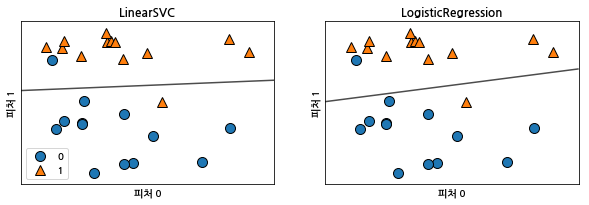

In [8]:
# 관련 패키지-모듈-메서드(알고리즘) 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 데이터셋 로딩
X, y = mglearn.datasets.make_forge()

# 그래프 프레임 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 선형분류알고리즘별 분류결과 서브플롯에 시각화

# 각 분류알고리즘과 서브플롯을 for 반복변수로 로딩
for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression(solver = 'liblinear')], axes):
    # - solver = 'liblinear' 옵션을 통해 이항분류모델로 피팅한다는 의미
    
    # 각 분류알로리즘별 객체생성
    clf = model.fit(X, y)
    
    # 각 분류알고리즘별 서브플롯에 피처:예측(독립)변수 플롯팅 
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                    ax = ax, alpha = .7)

    # 제3의 변수로 타깃:반응(종속) 변수를 조절변수로 투입 플롯팅
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    # 각 서브플롯별 제목, x, y축레이블 설정
    ax.set_title("{}".format(clf.__class__.__name__))  # clf.__class__.__name__ 생성자로 알고리즘 이름이 들어가 있음.-> 이름 알아서 뿌려줌
    ax.set_xlabel("피처 0")
    ax.set_ylabel("피처 1")

# 그래프 전체에 대한 범례설정
axes[0].legend()

## 선형모형의 과다추정을 방지하기 위한 규제강도(Regulization Strength) 반영

#### 규제(벌점)의 종류

* 규제에는 L2규제(벌점)와 L1규제(벌점)가 있음
* L이라는 문자는 규제강도를 나타내는 수학기호로 람다(λ: lamda)에서 유래함<br>

* <font color=blue>L2규제(벌점)</font>: 회귀계수 과다추정방지위해 모든 회귀계수를 0으로 가깝게 만들어 주며, 모형에서 탈락시키지는 않음 -> 릿지회귀
* <font color=blue>L1규제(벌점)</font>: 회귀계수 과다추정방지위해 중요하지 않은 회귀계수를 0으로 만들어 탈락시켜, 중요한 피처중심으로 예측모형을 구성함 -> 라쏘회귀
* 기본적으로 L2규제를 사용하며, 중요한 특성이 많지 않고 중요한 피처위주로 모형구성이 필요한경우 L1규제를 사용함

#### 규제강도 조율파라미터

* <font color=blue>수치예측을 위한 선형회귀모델</font>: <font color=red>alpha</font> 조율파라미터 사용 (일반선형모형, 릿지회귀, 라소회귀, 엘라스틱넷)
* <font color=blue>분류예측을 위한 선형분류모델</font>: <font color=red>C</font> 조율파라미터 사용 (로지스틱회귀, 서포트벡터분류기) - Classification / Cost의 C라고 생각하면 된다
* alpha값과 C값은 로그스케일(로그변환)방식을 사용해 자릿수가 10배씩 변화도록 값을 설정함: 0.001, 0.01, 0.1, 1, 10, 100 등

#### alpha값을 낮춘다(선형회귀), C값을 높인다(선형분류)는 의미: <font color = blue>규제(벌점)강도를 낮춰</font> 회귀계수 과다추정을 허용해 예측모델이 복잡해짐 
* 훈련셋의 예측정확도를 우선적으로 높이는데 중점을 두고, 테스트셋의 예측정확도가 낮아 차이나는 손실(비용)은 어느정도 허용(감수)하겠다는 의미
* 훈련셋의 개별 데이터포인트 하나하나를 정확히 분류할 수 있도록 피처별 회귀계수가 과다추정이 되도록 하야 모델의 복잡도를 높인다다는 시도임
* 회귀계수 추정시에 과다추정을 막기 위한 벌점, 즉 규제의 강도를 가급적 낮추어 훈련셋을 활용한 예측모델의 정확도를 우선 높이겠다는 시도임
* 훈련데이터셋에 대한 과적합화 가능성이 있어 테스트셋에 대해서는 불안정한 예측력을 보일 수도 있는데, <br>그 정도의 손실은 일종의 비용차원에서 감수하겠다는 의미임

#### alpha값을 높인다(선형회귀), C값을 낮춘다(선형분류)는 의미: <font color = blue>규제(벌점)강도를 높여</font> 회귀계수 과다추정을 방지해 예측모델이 단순해짐
* 훈련셋의 예측정확도와 테스트셋의 예측정확도가 차이가 나는 손실(비용)을 가급적 허용하지 않겠다는 의미

* 훈련셋의 개별 데이터포인트 하나하나를 정확히 분류하기 보다는 <br>다수의 특성에 맞추어 일부 오분류를 허용하도록 회귀계수가 적정추정이 되도록 하여 모델의 복잡도를 단순화 하겠다는 시도임
* 회귀계수 추정시에 과다추정을 막기 위한 벌점, 즉 규제의 강도를 가급적 높여 훈련셋을 활용한 예측모델의 정확도를 적정수준으로 확보하겠다는 시도임
* 훈련데이터셋에 대한 예측력을 적정한 수준으로 확보하고, 테스트셋의 예측력도 유사한 수준으로 만들어 <br>예측력의 차이가 발생하는 손실을 일종의 비용차원에서 억제하겠다는 의미임
* 물론, alpha값을 지나치게 높이거나 C값을 지나치게 낮추면 훈련셋에 대한 낮은 정확성을 확보하게 되므로, 테스트셋에 대한 정확성도 낮아지는 과소적합 가능성이 커지게 됨

### 선형분류모형의 조율파라미터 C값의 변화에 따른 분류 결정경계의 변화

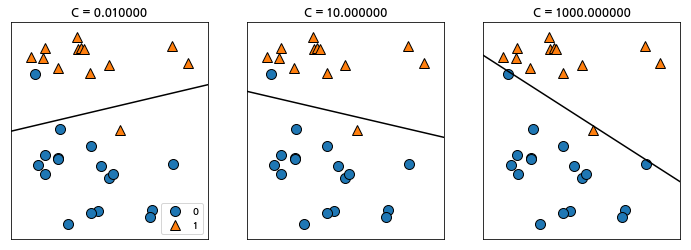

In [10]:
# mglearn 패키지에 있는 선형서포트벡터머신에 대한 파라미터 C(Cost: 비용)설정에 따른 분류 결정경계의 변화 그래프
# - 해당 패키지에 내장된 그림을 그냥 보여준 것임
mglearn.plots.plot_linear_svc_regularization()

## 이진(이항)클래스 분류를 위한 선형모델: 로지스틱회귀모형과 breast_cancer 데이터셋 이용

In [116]:
# 관련 모듈 일괄 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [102]:
# 데이터 로딩
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [103]:
# cancer 데이터셋 객체유형와 키(key) 정보확인
print(type(cancer))
print(cancer.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [104]:
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [105]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

### 로지스틱회귀모형의 기본 계수추정방식: L2규제(벌점) 
* 회귀계수 과다추정방지위해 모든 회귀계수를 0으로 가깝게 만들어 주며, 모형에서 탈락시키지는 않음

In [114]:
# 로지스틱회귀 피팅
# - C = 1이라는 디폴트 파라미터가 생략된채로 설정되어 있는 것임

logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
# - solver = 'liblinear' 옵션을 통해 이항분류모델로 피팅한다는 의미

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(logreg.coef_ != 0)))

# - 기본적으로 로지스틱회귀모형은 L2규제(벌점)을 사용하는 모델로
#   훈련모형의 피팅결과 투입한 피처:예측(독립)변수의 갯수가 그대로 유지됨
# - C 파라미터를 적절히 사용해 회귀계수의 과다추정을 방지하기 위해 조율하는데,
#   어느 회귀계수라도 0으로 만들어 피처자체를 탈락시키지 않음

# - penalty="l1"라는 파라미터를 추가하면 L1규제(벌점) 방식으로 모델을 피팅하게 되어
#   중요한 피처위주로 남기며, 중요하지 않은 피처의 회귀계수는 0으로 만들어 탈락시키는
#   피처선택(feature selection) 효과를 누릴 수 있음

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958
사용한 피처의 개수: 30


In [89]:
# 사용힌 피처별 회귀계수값
print(logreg.coef_) 
# - nd차원 배열임

print(logreg.coef_.reshape((-1))) 
# 1차원 배열로 변경해 피처이름들(1차원 배열)과 연결할 수 있음

[[ 1.90876683e+00  9.98788148e-02 -7.65567571e-02  1.30875965e-03
  -1.36948317e-01 -3.86693503e-01 -5.71948682e-01 -2.83323656e-01
  -2.23813863e-01 -3.50526844e-02  3.04455316e-03  1.25223693e+00
   9.49523571e-02 -9.63789785e-02 -1.32044174e-02 -2.43125981e-02
  -5.86034313e-02 -3.35199227e-02 -4.10795998e-02  1.53205924e-03
   1.24707244e+00 -3.19709151e-01 -9.61881472e-02 -2.66335879e-02
  -2.44041661e-01 -1.24420873e+00 -1.58319440e+00 -5.78354663e-01
  -6.80060645e-01 -1.30760323e-01]]
[ 1.90876683e+00  9.98788148e-02 -7.65567571e-02  1.30875965e-03
 -1.36948317e-01 -3.86693503e-01 -5.71948682e-01 -2.83323656e-01
 -2.23813863e-01 -3.50526844e-02  3.04455316e-03  1.25223693e+00
  9.49523571e-02 -9.63789785e-02 -1.32044174e-02 -2.43125981e-02
 -5.86034313e-02 -3.35199227e-02 -4.10795998e-02  1.53205924e-03
  1.24707244e+00 -3.19709151e-01 -9.61881472e-02 -2.66335879e-02
 -2.44041661e-01 -1.24420873e+00 -1.58319440e+00 -5.78354663e-01
 -6.80060645e-01 -1.30760323e-01]


In [90]:
# 피처: 예측(독립)변수 이름
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [91]:
# 로지스틱 분류예측모형 피처별 회귀계수
var_coef = pd.DataFrame({'feature': cancer.feature_names,
                            'coefficient': logreg.coef_.reshape((-1))})
var_coef

,feature,coefficient
0,mean radius,1.908767
1,mean texture,0.099879
2,mean perimeter,-0.076557
3,mean area,0.001309
4,mean smoothness,-0.136948
5,mean compactness,-0.386694
6,mean concavity,-0.571949
7,mean concave points,-0.283324
8,mean symmetry,-0.223814
9,mean fractal dimension,-0.035053


In [97]:
# C = 100 모델
logreg100 = LogisticRegression(solver = 'liblinear', C = 100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(logreg.coef_ != 0)))

# - C 파라미터값을 높여, 규제의 강도를 낮춤
# - 개별 데이터포인트에 대한 분류를 정확히 할 수 있도록 
#   회귀계수가 과다추정되는 방향으로 피팅해 훈련데이터셋에 대한 정확도를 우선적으로 확보하려는 시도임

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965
사용한 피처의 개수: 30


In [98]:
# C = 0.1 모델
logreg001 = LogisticRegression(solver = 'liblinear', C = 0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))
print("사용한 피처의 개수: {}".format(np.sum(logreg.coef_ != 0)))

# - C 파라미터값을 낮추어, 규제의 강도를 높임
# - 개별 데이터포인트에 대한 분류보다는 다수의 특성에 맞추어 일부 오분류를 허용하도록 
#   회귀계수가 적정추정이 되도록 하겠다는 시도임
#   회귀계수의 과다추정을 억제하는 방향으로 피팅해 훈련데이터셋에 대한 정확도를 적정수준에서 확보하려는 시도임

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930
사용한 피처의 개수: 30


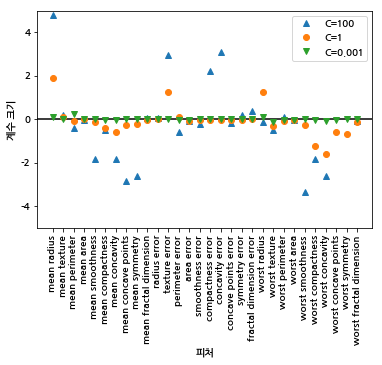

In [100]:
# 로지스틱회귀 모델간 종합 플로팅

# C 파라미터 설정모델별 플롯팅
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")

# x축 눈금 표현
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()

# 수평가이드라인 설정
plt.hlines(0, xlims[0], xlims[1])

# x, y축 범위 설정
plt.xlim(xlims)
plt.ylim(-5, 5)

# x, y축 레이블
plt.xlabel("피처")
plt.ylabel("계수 크기")

# 범례설정
plt.legend()

c = 100이 0과 1을 더 뚜렷하게 분리하는 패턴을 갖고 있다.

`LogisticRegression`의 `max_iter` 매개변수 기본값은 100입니다. 사이킷런 0.20 버전에서 수렴에 도달하지 못했다는 경고 메세지를 피하기 위해 1000으로 증가시킵니다.

### 로지스틱회귀모형의 기본 계수추정방식: L1규제(벌점) 사용
* 회귀계수 과다추정방지위해 중요하지 않은 회귀계수를 0으로 만들어 탈락시켜, 중요한 피처중심으로 예측모형을 구성함

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=0.001 인 l1 로지스틱 회귀의 사용피처 갯수: 3

C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 사용피처 갯수: 10

C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
C=100.000 인 l1 로지스틱 회귀의 사용피처 갯수: 23



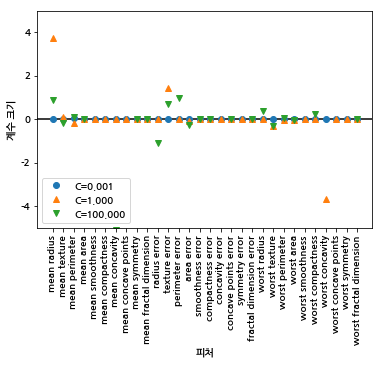

In [115]:
# 로지스틱회귀모델 파라미터 자동피팅 & 종합 플로팅

# for문을 이용해 C 파라미터값과 플로팅될 marker의 모양을 준비
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    
    # panalty='l1'을 통해 L1규제(벌점) 방식으로 회귀계수를 추정함
    lr_l1 = LogisticRegression(solver = 'liblinear', C = C, penalty="l1", max_iter = 1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 사용피처 갯수: {}".format(C, np.sum(lr_l1.coef_ != 0)))
    print()    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

# - 기본적으로 로지스틱회귀모형은 L2규제(벌점)을 사용하는 모델로
#   훈련모형의 피팅결과 투입한 피처:예측(독립)변수의 갯수가 그대로 유지됨
# - C 파라미터를 적절히 사용해 회귀계수의 과다추정을 방지하기 위해 조율하는데,
#   어느 회귀계수라도 0으로 만들어 피처자체를 탈락시키지 않음

# - penalty="l1"라는 파라미터를 추가하면 L1규제(벌점) 방식으로 모델을 피팅하게 되어
#   중요한 피처위주로 남기며, 중요하지 않은 피처의 회귀계수는 0으로 만들어 탈락시키는
#   피처선택(feature selection) 효과를 누릴 수 있음    

# 그래프 축 관련 세부묘사
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("피처")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

## 다중클래스 분류를 위한 선형모델: 선형서포트벡터머신과 blobs 데이터셋 이용(p.93) 

In [165]:
# 관련 모듈 일괄 로딩
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import mglearn
import numpy as np
import pandas as pd

### 데이터 로딩

In [174]:
# 데이터 로딩: 1개 객체로 일괄로딩
blobs = make_blobs(random_state=42)

print(type(blobs), len(blobs))
# - 하나의 튜블객체에 2개 요소로 구성된 데이터셋

print(type(blobs[0]), blobs[0].shape) 
# - 첫번째 요소: 피처:예측(독립)변수 데이터셋, 다차원 배열구조임

print(type(blobs[1]), blobs[1].shape)
# - 두번째 요소: 타깃:반응(종속)벼수 데이터셋, 1차원 배열구조임

<class 'tuple'> 2
<class 'numpy.ndarray'> (100, 2)
<class 'numpy.ndarray'> (100,)


In [175]:
# 데이터 로딩: 피처와 타깃셋으로 나누어 로딩
X, y = make_blobs(random_state=42)
# - 피처셋을 X에, 타깃셋을 y에 별도 객체로 직접로딩

print(type(X), X.shape, '\n', X[:10]) 
# - X객체: 피처:예측(독립)변수 데이터셋, 다차원 배열구조임

print()

print(type(y), y.shape, '\n', y)
# - y객체: 타깃:반응(종속)벼수 데이터셋, 1차원 배열구조임

<class 'numpy.ndarray'> (100, 2) 
 [[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]]

<class 'numpy.ndarray'> (100,) 
 [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


### 클래스 분포현황 파악

In [178]:
# 소문자 y에 할당된 1차원 배열로 있는 반응(종속)변수 데이터셋의 기술통계
import numpy as np
print('반응(종속)변수 데이터셋 클래스 유형:', np.unique(y))
print('반응(종속)변수 데이터셋 전체내용의 기술통계:', np.bincount(y))

print()

for k, v in  zip(np.unique(y), np.bincount(y)): 
    pct = v / sum(np.bincount(y)) 
    print("레이블: %d, 빈도수: %d, 비율: %0.3f" % (k, v, pct))
    # print("레이블: {0}, 빈도수: {1}, 비율: {2:0.3f}".format(k, v, pct))
    # print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}")

반응(종속)변수 데이터셋 클래스 유형: [0 1 2]
반응(종속)변수 데이터셋 전체내용의 기술통계: [34 33 33]

레이블: 0, 빈도수: 34, 비율: 0.340
레이블: 1, 빈도수: 33, 비율: 0.330
레이블: 2, 빈도수: 33, 비율: 0.330


### 클래스분포 시각화

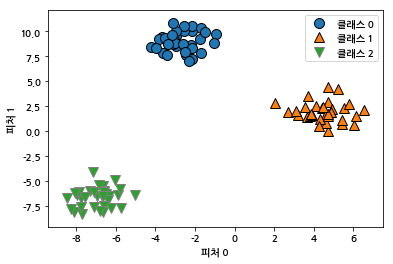

In [179]:
# 데이터셋 산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# - 2개 예측변수로 구성된 피처(독립변수)셋을 각각 x축, y축으로 플롯팅
# - 여기에 0, 1, 2 다중클래스로 구성된 반응변수인 타깃(종속변수)를 제3의 조건변수로 투입함

plt.xlabel("피처 0")
plt.ylabel("피처 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

### 데이터 분할

In [181]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

### 분류용 선형모델 피팅

In [228]:
# 선형서포트벡터분류기 객체생성과 훈련데이터 피팅
linear_svm = LinearSVC().fit(X, y)
# - linear_svm에는 총 3개의 일대다(one vs. all) 분류기가 만들어지게 됨
# - 클래스0과 나머지클래스(1, 2)를 구분하는 일대다 분류기
# - 클래스1과 나머지클래스(0, 2)를 구분하는 일대다 분류기
# - 클래스2와 나머지클래스(0, 1)를 구분하는 일대다 분류기

print(linear_svm, '\n')

print("클래스별 분류모형 계수배열 크기:", linear_svm.coef_.shape)
print("클래스별 분류모형 피처의 계수:\n", linear_svm.coef_)
print()

print("클래스별 분류모형 절편배열 크기:", linear_svm.intercept_.shape)
print("클래스별 분류모형 절편 수치:", linear_svm.intercept_)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 

클래스별 분류모형 계수배열 크기: (3, 2)
클래스별 분류모형 피처의 계수:
 [[-0.17492439  0.23140157]
 [ 0.47621471 -0.06937453]
 [-0.18914207 -0.20400532]]

클래스별 분류모형 절편배열 크기: (3,)
클래스별 분류모형 절편 수치: [-1.07745512  0.1314037  -0.08604997]


### 세부 일대다 분류기 결정경계 시각화

In [214]:
# x축에 반영할 임의의 피처데이터 생성
line = np.linspace(-15, 15)
# - 지정된 범위구간내 디폴트로 50개의 실수데이터가 생성됨
line.shape
line

array([-15.        , -14.3877551 , -13.7755102 , -13.16326531,
       -12.55102041, -11.93877551, -11.32653061, -10.71428571,
       -10.10204082,  -9.48979592,  -8.87755102,  -8.26530612,
        -7.65306122,  -7.04081633,  -6.42857143,  -5.81632653,
        -5.20408163,  -4.59183673,  -3.97959184,  -3.36734694,
        -2.75510204,  -2.14285714,  -1.53061224,  -0.91836735,
        -0.30612245,   0.30612245,   0.91836735,   1.53061224,
         2.14285714,   2.75510204,   3.36734694,   3.97959184,
         4.59183673,   5.20408163,   5.81632653,   6.42857143,
         7.04081633,   7.65306122,   8.26530612,   8.87755102,
         9.48979592,  10.10204082,  10.71428571,  11.32653061,
        11.93877551,  12.55102041,  13.16326531,  13.7755102 ,
        14.3877551 ,  15.        ])

In [215]:
# 3개의 일대다 분류모형의 결정경계를 플롯팅하기 위해 회귀계수, 절편, 색상을 조합함
list(zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors))

[(array([-0.17491922,  0.23140549]), -1.0774547156442114, '#0000aa'),
 (array([ 0.47622053, -0.06937455]), 0.1314062921952188, '#ff2020'),
 (array([-0.18913871, -0.20400525]), -0.08604928749439952, '#50ff50')]

In [218]:
# 일다대 분류기 모델을 통해 y축에 반영할 데이터 생성
-(line * coef[0] + intercept) / coef[1]

array([ 13.48510073,  12.91747216,  12.34984358,  11.78221501,
        11.21458643,  10.64695785,  10.07932928,   9.5117007 ,
         8.94407213,   8.37644355,   7.80881497,   7.2411864 ,
         6.67355782,   6.10592924,   5.53830067,   4.97067209,
         4.40304352,   3.83541494,   3.26778636,   2.70015779,
         2.13252921,   1.56490064,   0.99727206,   0.42964348,
        -0.13798509,  -0.70561367,  -1.27324225,  -1.84087082,
        -2.4084994 ,  -2.97612797,  -3.54375655,  -4.11138513,
        -4.6790137 ,  -5.24664228,  -5.81427085,  -6.38189943,
        -6.94952801,  -7.51715658,  -8.08478516,  -8.65241374,
        -9.22004231,  -9.78767089, -10.35529946, -10.92292804,
       -11.49055662, -12.05818519, -12.62581377, -13.19344234,
       -13.76107092, -14.3286995 ])

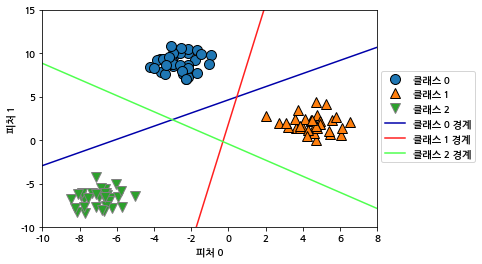

In [235]:
# for문을 이용한 멀티클래스 분류를 위해 도출된 3개의 이진분류기에 대한 시각화

# 전체적인 다중클래스 분포현황 플롯팅
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# x축에 반영할 임의의 피처데이터 생성
line = np.linspace(-15, 15)
# - 지정된 범위구간내 디폴트로 50개의 실수데이터가 생성됨

# 3개의 이진분류모형의 회귀계수, 절편, 색상을 조합함
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_, 
                                  mglearn.cm3.colors):
    
    # 분류 결정경계선 플롯팅
    plt.plot(line, -(coef[0]*line  + intercept) / coef[1], c = color)
    # - x축: 임의대로 생성한 피처데이터 50개를 투입함
    # - y축: x축에 특정 피처값이 주어졌을 때 
    #        각 클래스별 분류모형(계수값 + 절편)을 활용해 
    #        피처1대피 피처0의 변화량을 계산함 
     
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("피처 0")
plt.ylabel("피처 1")

plt.legend(['클래스 0', '클래스 1', '클래스 2', 
            '클래스 0 경계', '클래스 1 경계','클래스 2 경계'], loc = (1.01, 0.3))

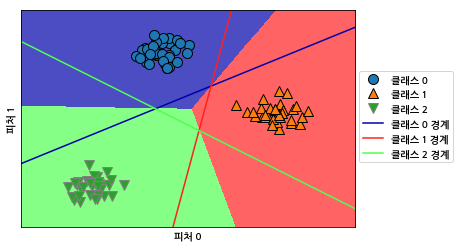

In [237]:
# 일대다 분류기 영역표시

# 3개의 일대다 분류기 모형에 피처셋(X)를 영역으로 표시되도록 플롯팅
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)

# 전체적인 다중클래스 분포현황 플롯팅
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# x축에 반영할 임의의 피처데이터 생성
line = np.linspace(-15, 15)
# - 지정된 범위구간내 디폴트로 50개의 실수데이터가 생성됨

# 3개의 이진분류모형의 회귀계수, 절편, 색상을 조합함
for coef, intercept, color in zip(linear_svm.coef_, 
                                  linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel("피처 0")
plt.ylabel("피처 1")

plt.legend(['클래스 0', '클래스 1', '클래스 2', 
            '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))


# 사이킷런의 메서드 연결 코딩방법

### 방법1: 객체생성-훈련셋피팅-미래값예측을 순차적으로 실행

In [251]:
# 모델객체생성
logreg = LogisticRegression(solver='liblinear')

# 훈련모델피팅
logreg.fit(X_train, y_train)

# 예측결과도출
logreg.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### 방법2: 객체생성-훈련셋피팅을 동시에, 미래값예측을 순차적으로 실행

In [252]:
# 모델객체생성과 훈련셋 피팅을 동시에 진행
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# 예측결과도출
logreg.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### 방법3: 객체생성을 먼저하고, 훈련셋피팅과 미래값예측을 동시에 실행

In [253]:
# 모델객체생성과 훈련셋 피팅을 동시에 진행
logreg = LogisticRegression(solver='liblinear')

# 예측결과도출
y_pred = logreg.fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### 방법4: 객체생성-훈련셋피팅-미래값예측을 전체적으로 동시에 실행

In [250]:
# 모델객체생성과 훈련셋피팅, 미래값예측을 동시에 실행
y_pred = LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred = LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test)

# End of Source